<a href="https://colab.research.google.com/github/ejay34/yandex_praktikum_projects/blob/main/04.%20%D0%9E%D1%82%D1%82%D0%BE%D0%BA%20%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Отток клиентов

Условный заказчик исследования - «Бета-Банк» - предоставил исторические данные о поведении клиентов и расторжении договоров с банком. Необходимо построить модель с предельно большим значением F1-меры, но не менее 0.59. Дополнительно необходимо измерить AUC-ROC и сравнить её значение с F1-мерой.

*Цель исследования:* Спрогнозировать, уйдёт ли в ближайшее время клиент из банка.

*Этапы исследования:*
1.  Подготовка данных
2.  Исследование задачи
  -  Модель DecisionTree
  -  Модель RandomForest
  -  Модель LogisticRegression
  -  ROC-кривая
3.  Борьба с дисбалансом
  -  Добавление class_weight='balanced'
  -  Увеличение выборки
  -  Увеличение выборки с балансировкой классов
  -  Уменьшение выборки с балансировкой классов
4.  Краткий вывод
5.  Тестирование модели
6.  Итоговый вывод

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Импорт-необходимых-библиотек-и-загрузка-данных" data-toc-modified-id="Импорт-необходимых-библиотек-и-загрузка-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Импорт необходимых библиотек и загрузка данных</a></span></li><li><span><a href="#Вывод-основной-информации-о-датафрейме" data-toc-modified-id="Вывод-основной-информации-о-датафрейме-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Вывод основной информации о датафрейме</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Подготовка-признаков" data-toc-modified-id="Подготовка-признаков-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Подготовка признаков</a></span></li><li><span><a href="#Разделение-признаков-на-предсказывающие-и-целевой" data-toc-modified-id="Разделение-признаков-на-предсказывающие-и-целевой-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Разделение признаков на предсказывающие и целевой</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Модель-&quot;Дерево-решений&quot;" data-toc-modified-id="Модель-&quot;Дерево-решений&quot;-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Модель "Дерево решений"</a></span></li><li><span><a href="#Модель-&quot;Случайный-лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-лес&quot;-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Модель "Случайный лес"</a></span></li><li><span><a href="#Модель-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Модель-&quot;Логистическая-регрессия&quot;-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Модель "Логистическая регрессия"</a></span></li><li><span><a href="#Результаты" data-toc-modified-id="Результаты-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Результаты</a></span></li><li><span><a href="#Построим-ROC-кривую" data-toc-modified-id="Построим-ROC-кривую-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Построим ROC-кривую</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Добавление-class_weight='balanced'" data-toc-modified-id="Добавление-class_weight='balanced'-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавление <code>class_weight='balanced'</code></a></span><ul class="toc-item"><li><span><a href="#Модель-&quot;Дерево-решений&quot;" data-toc-modified-id="Модель-&quot;Дерево-решений&quot;-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Модель "Дерево решений"</a></span></li><li><span><a href="#Модель-&quot;Случайный-лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-лес&quot;-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>Модель "Случайный лес"</a></span></li><li><span><a href="#Модель-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Модель-&quot;Логистическая-регрессия&quot;-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>Модель "Логистическая регрессия"</a></span></li><li><span><a href="#Результаты" data-toc-modified-id="Результаты-3.1.4"><span class="toc-item-num">3.1.4&nbsp;&nbsp;</span>Результаты</a></span></li><li><span><a href="#Построим-ROC-кривую" data-toc-modified-id="Построим-ROC-кривую-3.1.5"><span class="toc-item-num">3.1.5&nbsp;&nbsp;</span>Построим ROC-кривую</a></span></li></ul></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span><ul class="toc-item"><li><span><a href="#Увеличим-количество-положительных-ответов" data-toc-modified-id="Увеличим-количество-положительных-ответов-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>Увеличим количество положительных ответов</a></span></li><li><span><a href="#Модель-&quot;Дерево-решений&quot;" data-toc-modified-id="Модель-&quot;Дерево-решений&quot;-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>Модель "Дерево решений"</a></span></li><li><span><a href="#Модель-&quot;Случайный-лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-лес&quot;-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>Модель "Случайный лес"</a></span></li><li><span><a href="#Модель-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Модель-&quot;Логистическая-регрессия&quot;-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>Модель "Логистическая регрессия"</a></span></li><li><span><a href="#Результаты" data-toc-modified-id="Результаты-3.2.5"><span class="toc-item-num">3.2.5&nbsp;&nbsp;</span>Результаты</a></span></li><li><span><a href="#Построим-ROC-кривую" data-toc-modified-id="Построим-ROC-кривую-3.2.6"><span class="toc-item-num">3.2.6&nbsp;&nbsp;</span>Построим ROC-кривую</a></span></li></ul></li><li><span><a href="#Увеличение-выборки-с-балансировкой-классов-class_weight='balanced'" data-toc-modified-id="Увеличение-выборки-с-балансировкой-классов-class_weight='balanced'-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Увеличение выборки с балансировкой классов <code>class_weight='balanced'</code></a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Уменьшение выборки</a></span><ul class="toc-item"><li><span><a href="#Уменьшим-количество-отрицательных-ответов" data-toc-modified-id="Уменьшим-количество-отрицательных-ответов-3.4.1"><span class="toc-item-num">3.4.1&nbsp;&nbsp;</span>Уменьшим количество отрицательных ответов</a></span></li><li><span><a href="#Модель-&quot;Дерево-решений&quot;" data-toc-modified-id="Модель-&quot;Дерево-решений&quot;-3.4.2"><span class="toc-item-num">3.4.2&nbsp;&nbsp;</span>Модель "Дерево решений"</a></span></li><li><span><a href="#Модель-&quot;Случайный-лес&quot;" data-toc-modified-id="Модель-&quot;Случайный-лес&quot;-3.4.3"><span class="toc-item-num">3.4.3&nbsp;&nbsp;</span>Модель "Случайный лес"</a></span></li><li><span><a href="#Модель-&quot;Логистическая-регрессия&quot;" data-toc-modified-id="Модель-&quot;Логистическая-регрессия&quot;-3.4.4"><span class="toc-item-num">3.4.4&nbsp;&nbsp;</span>Модель "Логистическая регрессия"</a></span></li><li><span><a href="#Результаты" data-toc-modified-id="Результаты-3.4.5"><span class="toc-item-num">3.4.5&nbsp;&nbsp;</span>Результаты</a></span></li><li><span><a href="#Пострим-ROC-кривую" data-toc-modified-id="Пострим-ROC-кривую-3.4.6"><span class="toc-item-num">3.4.6&nbsp;&nbsp;</span>Пострим ROC-кривую</a></span></li></ul></li><li><span><a href="#Уменьшение-выборки-с-балансировкой-классов-class_weight='balanced'" data-toc-modified-id="Уменьшение-выборки-с-балансировкой-классов-class_weight='balanced'-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Уменьшение выборки с балансировкой классов <code>class_weight='balanced'</code></a></span></li><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Краткий-вывод" data-toc-modified-id="Краткий-вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Краткий вывод</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li></ul></div>

## Подготовка данных

### Импорт необходимых библиотек и загрузка данных

In [ ]:
# Импортируем необходимые библиотеки
import pandas as pd

from tqdm import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import (StandardScaler,
                                   OneHotEncoder,
                                   OrdinalEncoder)
from sklearn.utils import shuffle

from sklearn.metrics import (precision_score,
                             f1_score,
                             confusion_matrix,
                             roc_auc_score,
                             roc_curve)

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment=None

# Ограничение десятичных знаков в типах данных float
pd.set_option('display.float_format', '{:.3f}'.format)

# Шаблон оформления графиков
sns.set_palette('deep')
sns.set_style("whitegrid")

In [ ]:
# Загрузим данные из csv-файла в переменную data
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')

### Вывод основной информации о датафрейме

In [ ]:
# Выведем информацию и датасете
print(f'Размерность исходных данных: \n\tобъектов - {df.shape[0]}, \n\tпризнаков - {df.shape[1]}\n')
display(df.head())
df.dtypes

Размерность исходных данных: 
	объектов - 10000, 
	признаков - 14



,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.000,0.000,1,1,1,101348.880,1
1,2,15647311,Hill,608,Spain,Female,41,1.000,83807.860,1,0,1,112542.580,0
2,3,15619304,Onio,502,France,Female,42,8.000,159660.800,3,1,0,113931.570,1
3,4,15701354,Boni,699,France,Female,39,1.000,0.000,2,0,0,93826.630,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.000,125510.820,1,1,1,79084.100,0


RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [ ]:
# Найдем количество пропущенных значений в столбцах датафрейма
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [ ]:
# Выполним проверку на явные дубликаты
print(f'Явных дубликатов: {df.duplicated().sum()}')

Явных дубликатов: 0


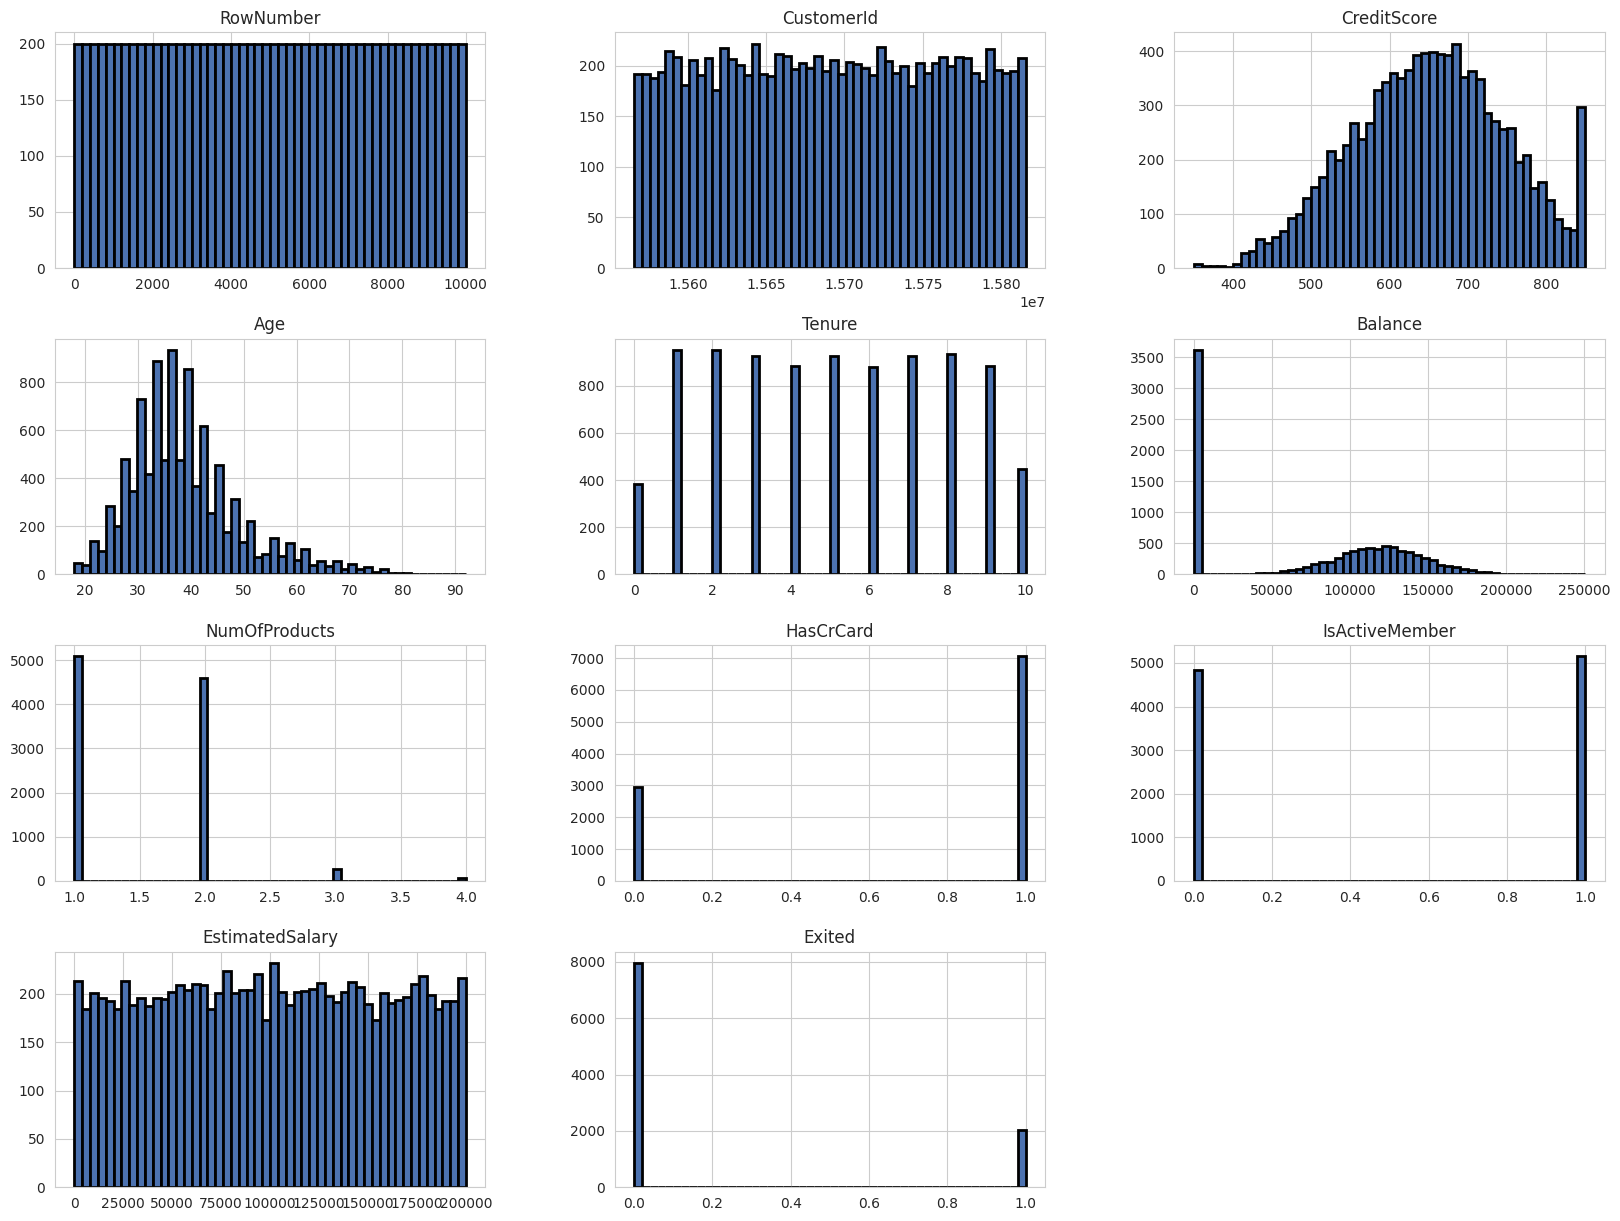

In [ ]:
df.hist(bins=50, figsize=(20,15), edgecolor='black', linewidth=2)
plt.show()

### Предобработка данных

In [ ]:
# Заменим пропущенные данные медианными
df.Tenure = (df.Tenure
             .fillna(df.Tenure.median())
             .astype('int64'))

### Подготовка признаков

In [ ]:
# Удалим из датасета столбцы 'RowNumber', 'CustomerId', 'Surname', так как они помешают обучению модели
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [ ]:
# Заменим наименования признаков в соответствии с PEP8
df.columns = ['credit_score', 'geography', 'gender', 'age', 'tenure', 'balance',
       'num_of_products', 'has_credit_card', 'is_active_member', 'estimated_salary',
       'exited']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   credit_score      10000 non-null  int64  
 1   geography         10000 non-null  object 
 2   gender            10000 non-null  object 
 3   age               10000 non-null  int64  
 4   tenure            10000 non-null  int64  
 5   balance           10000 non-null  float64
 6   num_of_products   10000 non-null  int64  
 7   has_credit_card   10000 non-null  int64  
 8   is_active_member  10000 non-null  int64  
 9   estimated_salary  10000 non-null  float64
 10  exited            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


### Разделение признаков на предсказывающие и целевой

In [ ]:
# Разделим данные по признакам на target и features
target = df.exited
features = df.drop('exited', axis=1)

**Исследуем соотношение классов по целевому признаку**

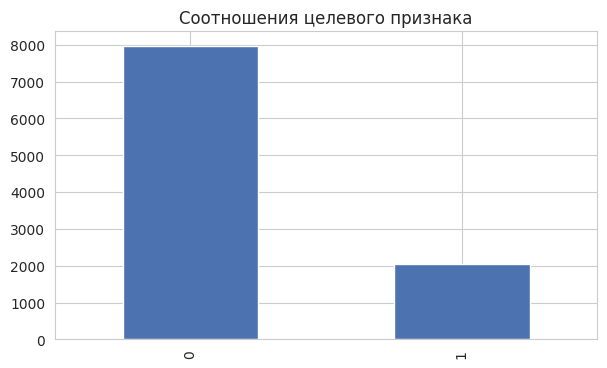

0   0.796
1   0.204
Name: exited, dtype: float64

In [ ]:
(df['exited']
 .value_counts()
 .plot(
     kind='bar',
     grid=True,
     figsize=(7, 4),
     title='Соотношения целевого признака')
)
plt.show()

target.value_counts(normalize=True)

In [ ]:
# Примем значение аргумента random_state в переменной state
STATE = 1231

# Разделяем исходные данные на обучающую и тестовую выборки в соотношении 60:40
# Затем, полученную тестовую выборку еще раз разделим на тестовую и валидационную
# Таким образом на обучающую выборку придется 60% данных, на тестовую и валидационную - по 20%
features_train, features_valid, target_train, target_valid = train_test_split(
    features,
    target,
    test_size=0.4,
    stratify=target,
    random_state=STATE)

# Тестовую выборку разделим на тестовую и валидационную
features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid,
    target_valid,
    test_size=0.5,
    stratify=target_valid,
    random_state=STATE)

print(f'Количество строк в обучающей выборке: {features_train.shape[0]}, или {(len(features_train) / len(df)):.1%} от исходных данных')
print(f'Количество строк в тестовой выборке: {features_test.shape[0]}, или {(len(features_test) / len(df)):.1%} от исходных данных')
print(f'Количество строк в валидационной выборке: {features_valid.shape[0]}, или {(len(features_valid) / len(df)):.1%} от исходных данных')

Количество строк в обучающей выборке: 6000, или 60.0% от исходных данных
Количество строк в тестовой выборке: 2000, или 20.0% от исходных данных
Количество строк в валидационной выборке: 2000, или 20.0% от исходных данных


In [ ]:
# Применим метод прямого кодирования для преобразования категориальных признаков
features_train = pd.get_dummies(features_train, drop_first=True)
features_valid = pd.get_dummies(features_valid, drop_first=True)
features_test = pd.get_dummies(features_test, drop_first=True)

features_train.columns = features_train.columns.str.lower()
features_valid.columns = features_valid.columns.str.lower()
features_test.columns = features_test.columns.str.lower()

features_train.head()

#columns = ['Gender', 'Geography']
#encoder = OneHotEncoder()
#ohe = pd.DataFrame(encoder.fit_transform(df[columns]))
#ohe.columns = encoder.get_feature_names_out(columns)
#df_ohe = df.join(ohe)
#df_ohe.drop(columns, axis=1, inplace=True)

,credit_score,age,tenure,balance,num_of_products,has_credit_card,is_active_member,estimated_salary,geography_germany,geography_spain,gender_male
3958,633,43,5,0.000,2,1,1,48249.880,0,0,1
5458,635,35,2,113635.160,1,1,0,90883.120,0,1,1
4045,687,36,5,0.000,1,1,0,17696.220,0,1,0
6313,575,27,3,139301.680,1,1,0,99843.980,0,0,1
2208,728,46,2,109705.520,1,1,0,20276.870,0,0,0


In [ ]:
# Масштабируем признаки

numeric = ['credit_score', 'age', 'balance', 'estimated_salary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])

pd.options.mode.chained_assignment = None

features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])

### Вывод

Данные прочитаны и сохранены в переменной `df`. Исходные данные содержат 10000 объектов и 14 признаков. Признак `Tenure` содержит 909 пропусков, которые мы обработаем ниже. Явных дубликатов в данных не выявлено. Из данных было решено удалить признаки `RowNumber`, `CustomerId` и `Surname`, так как они не несут важной информации для построения предсказывающей модели, и даже, могут ухудшить её.

Пропуски признака Tenure, содержащего в себе данные о стаже человека в статусе клиента банка, было решено заменить медианой. Решение заменить пропуски на нули, на наш взгляд, было бы не верным, так как другие признаки объекта намекают на то, что человек все же является клиентом банка.

На данном этапе был применен метод прямого кодирования для преобразования категориальных признаков в численные для того, чтобы модель могла учитывать эти данные при обучении. Признак Gender представлен признаком male, содержащим бинарные значения (если объект является мужчиной - 1, если женщиной - 0), для избежания мультиколлинеарности данных.

Наименования признаков были изменены в соответствии со стандартами PEP8 языка Python.

Исследовали дисбаланс классов целевого признака. Отрицательных классов в 3,91 раза больше положительных. Эти наблюдения мы применим ниже для балансировки данных.

Разделили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 60:20:20. При разделении выборок применили метод стратификации, чтобы избежать дисбаланса классов.

Так как датасет имеет различные по величинам признаки, было сделано масштабирование признаков, исключая признаки, содержащие бинарные значения.

## Исследование задачи

### Модель "Дерево решений"

In [ ]:
def TreeModel(X=X_train, y=y_train, balance=None):

  model = DecisionTreeClassifier(random_state=STATE,
                                 criterion='gini',
                                 class_weight=balanced)

  grid_params={'max_depth': range(1, 16)}

  grid = GridSearchCV(model,
                      grid_params,
                      cv=3,
                      scoring=make_scorer(f1_score,
                                          greater_is_better=True))

  grid.fit(X, y)

  print(grid.best_params_)

  model = grid.best_estimator_
  model.fit(X, y)

  predicted = model.predict(X)

  print('Метрика F1 для модели DecisionTreeClassifier =', round(grid.best_score_, 3))

  return model,


best_model_unbalanced_dr = None
best_result_f1_unbalanced_dr = 0
best_result_auc_roc_unbalanced_dr = 0
best_depth_unbalanced_dr = 0

for depth in range(1, 16):
    model_unbalanced_dr = DecisionTreeClassifier(
        random_state=STATE,
        max_depth=depth,
        criterion='gini')

    model_unbalanced_dr.fit(features_train, target_train)
    predictions_unbalanced_dr = model_unbalanced_dr.predict(features_valid)
    probabilities_unbalanced_dr = model_unbalanced_dr.predict_proba(features_valid)
    probabilities_one_valid_unbalanced_dr = probabilities_unbalanced_dr[:,1]
    result_f1_unbalanced_dr = f1_score(predictions_unbalanced_dr, target_valid)
    result_auc_roc_unbalanced_dr = roc_auc_score(target_valid, probabilities_one_valid_unbalanced_dr)

    if result_f1_unbalanced_dr > best_result_f1_unbalanced_dr:
        best_model_unbalanced_dr = model_unbalanced_dr
        best_result_f1_unbalanced_dr = result_f1_unbalanced_dr
        best_result_auc_roc_unbalanced_dr = result_auc_roc_unbalanced_dr
        best_depth_unbalanced_dr = depth

fpr_unbalanced_dr, tpr_unbalanced_dr, thresholds = roc_curve(target_valid, probabilities_one_valid_unbalanced_dr)

f1_unbalanced_dr = best_result_f1_unbalanced_dr
auc_roc_unbalanced_dr = best_result_auc_roc_unbalanced_dr

print('Наилучшие результаты модели Дерево решений:')
print(f'\n\tГлубина дерева:\t{best_depth_unbalanced_dr}')

NameError: ignored

In [ ]:
best_model_unbalanced_dr = None
best_result_f1_unbalanced_dr = 0
best_result_auc_roc_unbalanced_dr = 0
best_depth_unbalanced_dr = 0

for depth in range(1, 16):
    model_unbalanced_dr = DecisionTreeClassifier(
        random_state=STATE,
        max_depth=depth,
        criterion='gini')

    model_unbalanced_dr.fit(features_train, target_train)
    predictions_unbalanced_dr = model_unbalanced_dr.predict(features_valid)
    probabilities_unbalanced_dr = model_unbalanced_dr.predict_proba(features_valid)
    probabilities_one_valid_unbalanced_dr = probabilities_unbalanced_dr[:,1]
    result_f1_unbalanced_dr = f1_score(predictions_unbalanced_dr, target_valid)
    result_auc_roc_unbalanced_dr = roc_auc_score(target_valid, probabilities_one_valid_unbalanced_dr)

    if result_f1_unbalanced_dr > best_result_f1_unbalanced_dr:
        best_model_unbalanced_dr = model_unbalanced_dr
        best_result_f1_unbalanced_dr = result_f1_unbalanced_dr
        best_result_auc_roc_unbalanced_dr = result_auc_roc_unbalanced_dr
        best_depth_unbalanced_dr = depth

fpr_unbalanced_dr, tpr_unbalanced_dr, thresholds = roc_curve(target_valid, probabilities_one_valid_unbalanced_dr)

f1_unbalanced_dr = best_result_f1_unbalanced_dr
auc_roc_unbalanced_dr = best_result_auc_roc_unbalanced_dr

print('Наилучшие результаты модели Дерево решений:')
print(f'\n\tГлубина дерева:\t{best_depth_unbalanced_dr}')

### Модель "Случайный лес"

In [ ]:
best_model_unbalanced_rf = None
best_result_f1_unbalanced_rf = 0
best_result_auc_roc_unbalanced_rf = 0
best_est_unbalanced_rf = 0
best_depth_unbalanced_rf = 0

for est in tqdm(range(50, 70, 2)):
    for depth in range(10, 16):
        model_unbalanced_rf = RandomForestClassifier(
            random_state=STATE,
            n_estimators=est,
            max_depth = depth)

        model_unbalanced_rf.fit(features_train, target_train)
        predictions_unbalanced_rf = model_unbalanced_rf.predict(features_valid)
        probabilities_unbalanced_rf = model_unbalanced_rf.predict_proba(features_valid)
        probabilities_one_valid_unbalanced_rf = probabilities_unbalanced_rf[:,1]

        result_f1_unbalanced_rf = f1_score(predictions_unbalanced_rf, target_valid)
        result_auc_roc_unbalanced_rf = roc_auc_score(target_valid, probabilities_one_valid_unbalanced_rf)

        if result_f1_unbalanced_rf > best_result_f1_unbalanced_rf:
            best_model_unbalanced_rf = model_unbalanced_rf
            best_result_f1_unbalanced_rf = result_f1_unbalanced_rf
            best_result_auc_roc_unbalanced_rf = result_auc_roc_unbalanced_rf
            best_depth_unbalanced_rf = depth
            best_est_unbalanced_rf = est

fpr_unbalanced_rf, tpr_unbalanced_rf, thresholds = roc_curve(target_valid, probabilities_one_valid_unbalanced_rf)

f1_unbalanced_rf = best_result_f1_unbalanced_rf
auc_roc_unbalanced_rf = best_result_auc_roc_unbalanced_rf

print('Наилучшие результаты модели Случайный лес:')
print(f'\n\tГлубина дерева:\t\t{best_depth_unbalanced_rf}')
print(f'\tКоличество деревьев:\t{best_est_unbalanced_rf}')

### Модель "Логистическая регрессия"

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
best_model_unbalanced_lr = None
best_result_f1_unbalanced_lr = 0
best_result_auc_roc_unbalanced_lr = 0
best_solver_unbalanced_lr = None

for i in tqdm(solvers):
    model_unbalanced_lr = LogisticRegression(
            random_state=STATE,
            solver=i,
            max_iter=1000)

    model_unbalanced_lr.fit(features_train, target_train)
    predictions_unbalanced_lr = model_unbalanced_lr.predict(features_valid)
    probabilities_unbalanced_lr = model_unbalanced_lr.predict_proba(features_valid)
    probabilities_one_valid_unbalanced_lr = probabilities_unbalanced_lr[:,1]
    result_f1_unbalanced_lr = f1_score(predictions_unbalanced_lr, target_valid)
    result_auc_roc_unbalanced_lr = roc_auc_score(target_valid, predictions_unbalanced_lr)

    if result_f1_unbalanced_lr > best_result_f1_unbalanced_lr:
        best_model_unbalanced_lr = model_unbalanced_lr
        best_result_f1_unbalanced_lr = result_f1_unbalanced_lr
        best_result_auc_roc_unbalanced_lr = result_auc_roc_unbalanced_lr
        best_solver_unbalanced_lr = i

f1_unbalanced_lr = best_result_f1_unbalanced_lr
auc_roc_unbalanced_lr = best_result_auc_roc_unbalanced_lr

fpr_unbalanced_lr, tpr_unbalanced_lr, thresholds = roc_curve(target_valid, probabilities_one_valid_unbalanced_lr)

print('Наилучшие результаты модели Логистическая регрессия:')
print(f'\n\tАлгоритм решения:\t{best_solver_unbalanced_lr}')

### Результаты

In [ ]:
(
    pd.DataFrame(
        {'unbalanced': ['Дерево решений', 'Случайный лес', 'Логистическая регрессия'],
         'F1_score': [f1_unbalanced_dr, f1_unbalanced_rf, f1_unbalanced_lr],
         'AUC-ROC': [auc_roc_unbalanced_dr, auc_roc_unbalanced_rf, auc_roc_unbalanced_lr]})
    .set_index('unbalanced')
)

### Построим ROC-кривую

In [ ]:
plt.figure()

plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_unbalanced_lr, tpr_unbalanced_lr)
plt.plot(fpr_unbalanced_dr, tpr_unbalanced_dr)
plt.plot(fpr_unbalanced_rf, tpr_unbalanced_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель',
            'Логистическая регрессия',
            'Дерево решения',
            'Случайный лес'),
           loc= 'upper left')
plt.show()

**Промежуточный вывод:** На данном этапе мы обучили три модели на несбалансированных выборках и вычислили лучшие метрики каждой из них.

В результате, лучшей моделью оказалось Дерево решений (F1 = 0.574 и AUC-ROC = 0.820). Однако, модель Случайного леса отстает не значительно (F1 = 0.572 и AUC-ROC = 0.845). Логистическая регрессия сильно проигрывает (F1 = 0.335 и AUC-ROC = 0.596)

## Борьба с дисбалансом

### Добавление `class_weight='balanced'`

#### Модель "Дерево решений"

In [ ]:
best_model_balanced_dr = None
best_result_f1_balanced_dr = 0
best_result_auc_roc_balanced_dr = 0
best_depth_balanced_dr = 0

for depth in range(1, 16):
    model_balanced_dr = DecisionTreeClassifier(
        random_state=STATE,
        max_depth=depth,
        criterion='gini',
        class_weight='balanced')

    model_balanced_dr.fit(features_train, target_train)
    predictions_balanced_dr = model_balanced_dr.predict(features_valid)
    probabilities_balanced_dr = model_balanced_dr.predict_proba(features_valid)
    probabilities_one_valid_balanced_dr = probabilities_balanced_dr[:,1]
    result_f1_balanced_dr = f1_score(predictions_balanced_dr, target_valid)
    result_auc_roc_balanced_dr = roc_auc_score(target_valid, probabilities_one_valid_balanced_dr)

    if result_f1_balanced_dr > best_result_f1_balanced_dr:
        best_model_balanced_dr = model_balanced_dr
        best_result_f1_balanced_dr = result_f1_balanced_dr
        best_result_auc_roc_balanced_dr = result_auc_roc_balanced_dr
        best_depth_balanced_dr = depth

fpr_balanced_dr, tpr_balanced_dr, thresholds = roc_curve(target_valid, probabilities_one_valid_balanced_dr)

f1_balanced_dr = best_result_f1_balanced_dr
auc_roc_balanced_dr = best_result_auc_roc_balanced_dr

print('Наилучшие результаты модели Дерево решений:')
print(f'\n\tГлубина дерева:\t{best_depth_balanced_dr}')

#### Модель "Случайный лес"

In [ ]:
best_model_balanced_rf = None
best_result_f1_balanced_rf = 0
best_result_auc_roc_balanced_rf = 0
best_est_balanced_rf = 0
best_depth_balanced_rf = 0

for est in tqdm(range(50, 70, 2)):
    for depth in range(10, 16):
        model_balanced_rf = RandomForestClassifier(
            random_state=STATE,
            n_estimators=est,
            max_depth = depth,
            class_weight='balanced')

        model_balanced_rf.fit(features_train, target_train)
        predictions_balanced_rf = model_balanced_rf.predict(features_valid)
        probabilities_balanced_rf = model_balanced_rf.predict_proba(features_valid)
        probabilities_one_valid_balanced_rf = probabilities_balanced_rf[:,1]

        result_f1_balanced_rf = f1_score(predictions_balanced_rf, target_valid)
        result_auc_roc_balanced_rf = roc_auc_score(target_valid, probabilities_one_valid_balanced_rf)

        if result_f1_balanced_rf > best_result_f1_balanced_rf:
            best_model_balanced_rf = model_balanced_rf
            best_result_f1_balanced_rf = result_f1_balanced_rf
            best_result_auc_roc_balanced_rf = result_auc_roc_balanced_rf
            best_depth_balanced_rf = depth
            best_est_balanced_rf = est

fpr_balanced_rf, tpr_balanced_rf, thresholds = roc_curve(target_valid, probabilities_one_valid_balanced_rf)

f1_balanced_rf = best_result_f1_balanced_rf
auc_roc_balanced_rf = best_result_auc_roc_balanced_rf

print('Наилучшие результаты модели Случайный лес:')
print(f'\n\tГлубина дерева:\t\t{best_depth_balanced_rf}')
print(f'\tКоличество деревьев:\t{best_est_balanced_rf}')

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил расчет метрики AUC-ROC и добавил перебор гиперпараметров
</div>

#### Модель "Логистическая регрессия"

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
best_model_balanced_lr = None
best_result_f1_balanced_lr = 0
best_result_auc_roc_balanced_lr = 0
best_solver_balanced_lr = None

for i in tqdm(solvers):
    model_balanced_lr = LogisticRegression(
            random_state=STATE,
            solver=i,
            max_iter=1000,
            class_weight='balanced')

    model_balanced_lr.fit(features_train, target_train)
    predictions_balanced_lr = model_balanced_lr.predict(features_valid)
    probabilities_balanced_lr = model_balanced_lr.predict_proba(features_valid)
    probabilities_one_valid_balanced_lr = probabilities_balanced_lr[:,1]
    result_f1_balanced_lr = f1_score(predictions_balanced_lr, target_valid)
    result_auc_roc_balanced_lr = roc_auc_score(target_valid, predictions_balanced_lr)

    if result_f1_balanced_lr > best_result_f1_balanced_lr:
        best_model_balanced_lr = model_balanced_lr
        best_result_f1_balanced_lr = result_f1_balanced_lr
        best_result_auc_roc_balanced_lr = result_auc_roc_balanced_lr
        best_solver_balanced_lr = i

f1_balanced_lr = best_result_f1_balanced_lr
auc_roc_balanced_lr = best_result_auc_roc_balanced_lr

fpr_balanced_lr, tpr_balanced_lr, thresholds = roc_curve(target_valid, probabilities_one_valid_balanced_lr)

print('Наилучшие результаты модели Логистическая регрессия:')
print(f'\n\tАлгоритм решения:\t{best_solver_balanced_lr}')

<div class="alert alert-block alert-warning">
<b>Изменения:</b> Исправил расчет метрики AUC-ROC и добавил перебор гиперпараметров
</div>

#### Результаты

In [ ]:
balanced_models = (
    pd.DataFrame(
        {'balanced': ['Дерево решений', 'Случайный лес', 'Логистическая регрессия'],
         'F1_score': [f1_balanced_dr, f1_balanced_rf, f1_balanced_lr],
         'AUC-ROC': [auc_roc_balanced_dr, auc_roc_balanced_rf, auc_roc_balanced_lr]})
    .set_index('balanced')
)
balanced_models

#### Построим ROC-кривую

In [ ]:
plt.figure()

plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_balanced_lr, tpr_balanced_lr)
plt.plot(fpr_balanced_dr, tpr_balanced_dr)
plt.plot(fpr_balanced_rf,tpr_balanced_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Логистическая регрессия','Дерево решения','Случайный лес'),
           loc= 'upper left')
plt.show()

**Промежуточный вывод:** На данном этапе применили к обучающим моделям аргумент `class_weight='balanced'`, который определяет веса класса. По умолчанию, модель считает все классы равнозначными. При указании значения `'balanced'` модель автоматически настраивает веса классов, обратно пропорциональных частотам классов во входных данных.

После подстановки данного аргумента, лучший результат по метрике F1 показала модель Случайного леса, а по AUC-ROC - Дерево решений. Логистическая регрессия также сильно отстает

### Увеличение выборки

#### Увеличим количество положительных ответов

In [ ]:
# Увеличим в выборке положительные ответы в 4 раза
repeat = 4

features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

features_upsampled, target_upsampled = shuffle(
    features_upsampled,
    target_upsampled,
    random_state=STATE)

print(f'\nВ целевом признаке классы распределены в соотношении {target_upsampled.value_counts(normalize=True)[0]:.2%}/{target_upsampled.value_counts(normalize=True)[1]:.2%}')

#### Модель "Дерево решений"

In [ ]:
best_model_upsampled_dr = None
best_result_f1_upsampled_dr = 0
best_result_auc_roc_upsampled_dr = 0
best_depth_upsampled_dr = 0

for depth in range(1, 16):
    model_upsampled_dr = DecisionTreeClassifier(
        random_state=STATE,
        max_depth=depth,
        criterion='gini')

    model_upsampled_dr.fit(features_upsampled, target_upsampled)
    predictions_upsampled_dr = model_upsampled_dr.predict(features_valid)
    probabilities_upsampled_dr = model_upsampled_dr.predict_proba(features_valid)
    probabilities_one_valid_upsampled_dr = probabilities_upsampled_dr[:,1]
    result_f1_upsampled_dr = f1_score(predictions_upsampled_dr, target_valid)
    result_auc_roc_upsampled_dr = roc_auc_score(target_valid, probabilities_one_valid_upsampled_dr)

    if result_f1_upsampled_dr > best_result_f1_upsampled_dr:
        best_model_upsampled_dr = model_upsampled_dr
        best_result_f1_upsampled_dr = result_f1_upsampled_dr
        best_result_auc_roc_upsampled_dr = result_auc_roc_upsampled_dr
        best_depth_upsampled_dr = depth

fpr_upsampled_dr, tpr_upsampled_dr, thresholds = roc_curve(target_valid, probabilities_one_valid_upsampled_dr)

f1_upsampled_dr = best_result_f1_upsampled_dr
auc_roc_upsampled_dr = best_result_auc_roc_upsampled_dr

print('Наилучшие результаты модели Дерево решений:')
print(f'\n\tГлубина дерева:\t{best_depth_upsampled_dr}')

#### Модель "Случайный лес"

In [ ]:
best_model_upsampled_rf = None
best_result_f1_upsampled_rf = 0
best_result_auc_roc_upsampled_rf = 0
best_est_upsampled_rf = 0
best_depth_upsampled_rf = 0

for est in tqdm(range(50, 70, 2)):
    for depth in range(10, 16):
        model_upsampled_rf = RandomForestClassifier(
            random_state=STATE,
            n_estimators=est,
            max_depth = depth)

        model_upsampled_rf.fit(features_upsampled, target_upsampled)
        predictions_upsampled_rf = model_upsampled_rf.predict(features_valid)
        probabilities_upsampled_rf = model_upsampled_rf.predict_proba(features_valid)
        probabilities_one_valid_upsampled_rf = probabilities_upsampled_rf[:,1]

        result_f1_upsampled_rf = f1_score(predictions_upsampled_rf, target_valid)
        result_auc_roc_upsampled_rf = roc_auc_score(target_valid, probabilities_one_valid_upsampled_rf)

        if result_f1_upsampled_rf > best_result_f1_upsampled_rf:
            best_model_upsampled_rf = model_upsampled_rf
            best_result_f1_upsampled_rf = result_f1_upsampled_rf
            best_result_auc_roc_upsampled_rf = result_auc_roc_upsampled_rf
            best_depth_upsampled_rf = depth
            best_est_upsampled_rf = est

fpr_upsampled_rf, tpr_upsampled_rf, thresholds = roc_curve(target_valid, probabilities_one_valid_upsampled_rf)

f1_upsampled_rf = best_result_f1_upsampled_rf
auc_roc_upsampled_rf = best_result_auc_roc_upsampled_rf

print('Наилучшие результаты модели Случайный лес:')
print(f'\n\tГлубина дерева:\t\t{best_depth_upsampled_rf}')
print(f'\tКоличество деревьев:\t{best_est_upsampled_rf}')

#### Модель "Логистическая регрессия"

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
best_model_upsampled_lr = None
best_result_f1_upsampled_lr = 0
best_result_auc_roc_upsampled_lr = 0
best_solver_upsampled_lr = None

for i in tqdm(solvers):
    model_upsampled_lr = LogisticRegression(
            random_state=STATE,
            solver=i,
            max_iter=1000)

    model_upsampled_lr.fit(features_upsampled, target_upsampled)
    predictions_upsampled_lr = model_upsampled_lr.predict(features_valid)
    probabilities_upsampled_lr = model_upsampled_lr.predict_proba(features_valid)
    probabilities_one_valid_upsampled_lr = probabilities_upsampled_lr[:,1]
    result_f1_upsampled_lr = f1_score(predictions_upsampled_lr, target_valid)
    result_auc_roc_upsampled_lr = roc_auc_score(target_valid, predictions_upsampled_lr)

    if result_f1_upsampled_lr > best_result_f1_upsampled_lr:
        best_model_upsampled_lr = model_upsampled_lr
        best_result_f1_upsampled_lr = result_f1_upsampled_lr
        best_result_auc_roc_upsampled_lr = result_auc_roc_upsampled_lr
        best_solver_upsampled_lr = i

f1_upsampled_lr = best_result_f1_upsampled_lr
auc_roc_upsampled_lr = best_result_auc_roc_upsampled_lr

fpr_upsampled_lr, tpr_upsampled_lr, thresholds = roc_curve(target_valid, probabilities_one_valid_upsampled_lr)

print('Наилучшие результаты модели Логистическая регрессия:')
print(f'\n\tАлгоритм решения:\t{best_solver_upsampled_lr}')

#### Результаты

In [ ]:
upsampled_models = (
    pd.DataFrame(
        {'upsampling': ['Дерево решений', 'Случайный лес', 'Логистическая регрессия'],
         'F1_score': [f1_upsampled_dr, f1_upsampled_rf, f1_upsampled_lr],
         'AUC-ROC': [auc_roc_upsampled_dr, auc_roc_upsampled_rf, auc_roc_upsampled_lr]})
    .set_index('upsampling')
)
upsampled_models

#### Построим ROC-кривую

In [ ]:
plt.figure()

plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_upsampled_lr, tpr_upsampled_lr)
plt.plot(fpr_upsampled_dr, tpr_upsampled_dr)
plt.plot(fpr_upsampled_rf,tpr_upsampled_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Логистическая регрессия','Дерево решения','Случайный лес'),
           loc= 'upper left')
plt.show()

**Промежуточный вывод:** Следующим способом борьбы с дисбалансом рассмотрим увеличение положительных классов без автоматической настройки весов.

В результате, модель Случайный лес получила более высокое значение метрики F1. По метрике AUC-ROC модели Дерево решений и Случайный лес практически равны.

### Увеличение выборки с балансировкой классов `class_weight='balanced'`

### Уменьшение выборки

#### Уменьшим количество отрицательных ответов

In [ ]:
# Уменьшим в выборке отрицательные ответы в 4 раза

features_zeros = features_train[target_train == 0]
features_ones = features_train[target_train == 1]
target_zeros = target_train[target_train == 0]
target_ones = target_train[target_train == 1]

features_sample = features_zeros.sample(frac=0.2557, random_state=STATE)
target_sample = target_zeros.sample(frac=0.2557, random_state=STATE)

features_downsampled = pd.concat([features_sample] + [features_ones])
target_downsampled = pd.concat([target_sample] + [target_ones])

features_downsampled, target_downsampled = shuffle(
    features_downsampled,
    target_downsampled,
    random_state=STATE)

print(f'\nВ целевом признаке классы распределены в соотношении {target_downsampled.value_counts(normalize=True)[0]:.2%}/{target_downsampled.value_counts(normalize=True)[1]:.2%}')

#### Модель "Дерево решений"

In [ ]:
best_model_downsampled_dr = None
best_result_f1_downsampled_dr = 0
best_result_auc_roc_downsampled_dr = 0
best_depth_downsampled_dr = 0

for depth in range(1, 16):
    model_downsampled_dr = DecisionTreeClassifier(
        random_state=STATE,
        max_depth=depth,
        criterion='gini')

    model_downsampled_dr.fit(features_downsampled, target_downsampled)
    predictions_downsampled_dr = model_downsampled_dr.predict(features_valid)
    probabilities_downsampled_dr = model_downsampled_dr.predict_proba(features_valid)
    probabilities_one_valid_downsampled_dr = probabilities_downsampled_dr[:,1]
    result_f1_downsampled_dr = f1_score(predictions_downsampled_dr, target_valid)
    result_auc_roc_downsampled_dr = roc_auc_score(target_valid, probabilities_one_valid_downsampled_dr)

    if result_f1_downsampled_dr > best_result_f1_downsampled_dr:
        best_model_downsampled_dr = model_downsampled_dr
        best_result_f1_downsampled_dr = result_f1_downsampled_dr
        best_result_auc_roc_downsampled_dr = result_auc_roc_downsampled_dr
        best_depth_downsampled_dr = depth

fpr_downsampled_dr, tpr_downsampled_dr, thresholds = roc_curve(target_valid, probabilities_one_valid_downsampled_dr)

f1_downsampled_dr = best_result_f1_downsampled_dr
auc_roc_downsampled_dr = best_result_auc_roc_downsampled_dr

print('Наилучшие результаты модели Дерево решений:')
print(f'\n\tГлубина дерева:\t{best_depth_downsampled_dr}')

#### Модель "Случайный лес"

In [ ]:
best_model_downsampled_rf = None
best_result_f1_downsampled_rf = 0
best_result_auc_roc_downsampled_rf = 0
best_est_downsampled_rf = 0
best_depth_downsampled_rf = 0

for est in tqdm(range(50, 70, 2)):
    for depth in range(10, 16):
        model_downsampled_rf = RandomForestClassifier(
            random_state=STATE,
            n_estimators=est,
            max_depth = depth)

        model_downsampled_rf.fit(features_downsampled, target_downsampled)
        predictions_downsampled_rf = model_downsampled_rf.predict(features_valid)
        probabilities_downsampled_rf = model_downsampled_rf.predict_proba(features_valid)
        probabilities_one_valid_downsampled_rf = probabilities_downsampled_rf[:,1]

        result_f1_downsampled_rf = f1_score(predictions_downsampled_rf, target_valid)
        result_auc_roc_downsampled_rf = roc_auc_score(target_valid, probabilities_one_valid_downsampled_rf)

        if result_f1_downsampled_rf > best_result_f1_downsampled_rf:
            best_model_downsampled_rf = model_downsampled_rf
            best_result_f1_downsampled_rf = result_f1_downsampled_rf
            best_result_auc_roc_downsampled_rf = result_auc_roc_downsampled_rf
            best_depth_downsampled_rf = depth
            best_est_downsampled_rf = est

fpr_downsampled_rf, tpr_downsampled_rf, thresholds = roc_curve(target_valid, probabilities_one_valid_downsampled_rf)

f1_downsampled_rf = best_result_f1_downsampled_rf
auc_roc_downsampled_rf = best_result_auc_roc_downsampled_rf

print('Наилучшие результаты модели Случайный лес:')
print(f'\n\tГлубина дерева:\t\t{best_depth_downsampled_rf}')
print(f'\tКоличество деревьев:\t{best_est_downsampled_rf}')

#### Модель "Логистическая регрессия"

In [ ]:
solvers = ['lbfgs', 'liblinear', 'newton-cg', 'sag', 'saga']
best_model_downsampled_lr = None
best_result_f1_downsampled_lr = 0
best_result_auc_roc_downsampled_lr = 0
best_solver_downsampled_lr = None

for i in tqdm(solvers):
    model_downsampled_lr = LogisticRegression(
            random_state=STATE,
            solver=i,
            max_iter=1000)

    model_downsampled_lr.fit(features_downsampled, target_downsampled)
    predictions_downsampled_lr = model_downsampled_lr.predict(features_valid)
    probabilities_downsampled_lr = model_downsampled_lr.predict_proba(features_valid)
    probabilities_one_valid_downsampled_lr = probabilities_downsampled_lr[:,1]
    result_f1_downsampled_lr = f1_score(predictions_downsampled_lr, target_valid)
    result_auc_roc_downsampled_lr = roc_auc_score(target_valid, predictions_downsampled_lr)

    if result_f1_downsampled_lr > best_result_f1_downsampled_lr:
        best_model_downsampled_lr = model_downsampled_lr
        best_result_f1_downsampled_lr = result_f1_downsampled_lr
        best_result_auc_roc_downsampled_lr = result_auc_roc_downsampled_lr
        best_solver_downsampled_lr = i

f1_downsampled_lr = best_result_f1_downsampled_lr
auc_roc_downsampled_lr = best_result_auc_roc_downsampled_lr

fpr_downsampled_lr, tpr_downsampled_lr, thresholds = roc_curve(target_valid, probabilities_one_valid_downsampled_lr)

print('Наилучшие результаты модели Логистическая регрессия:')
print(f'\n\tАлгоритм решения:\t{best_solver_downsampled_lr}')

#### Результаты

In [ ]:
downsampled_models = (
    pd.DataFrame(
        {'downsampling': ['Дерево решений', 'Случайный лес', 'Логистическая регрессия'],
         'F1_score': [f1_downsampled_dr, f1_downsampled_rf, f1_downsampled_lr],
         'AUC-ROC': [auc_roc_downsampled_dr, auc_roc_downsampled_rf, auc_roc_downsampled_lr]})
    .set_index('downsampling')
)
downsampled_models

#### Пострим ROC-кривую

In [ ]:
plt.figure()

plt.figure(figsize=(12,8))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_downsampled_lr, tpr_downsampled_lr)
plt.plot(fpr_downsampled_dr, tpr_downsampled_dr)
plt.plot(fpr_downsampled_rf,tpr_downsampled_rf)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Логистическая регрессия','Дерево решения','Случайный лес'),
           loc= 'upper left')
plt.show()

**Промежуточный вывод:** В случае с уменьшением в выборке отрицательных классов значения метрики F1 во всех трех моделях сильно упали. Ни одна из моделей не смогла превысить заданных порог значения по этой метрике в 0,59

### Уменьшение выборки с балансировкой классов `class_weight='balanced'`

### Краткий вывод

Модель, обученная алгоритмом Случайный лес с увеличением положительных ответов дала результат метрики F1 = 0.612 и AUC-ROC = 0.847. Её и выберем, как лучшую для финального тестирования.

Аналогичные результаты показала модель, обученная алгоритмом Случайный лес с балансировкой классов аргументом `class_weight='balanced'`, 0.611 и 0.854, соответственно.

Худшие результаты принесла модель линейной регрессии, причем практически независимо от способа балансировки. Результаты лежат в пределах F1 = 0.48 - 0.491 и AUC-ROC = 0.694 - 0.702.

## Тестирование модели

In [ ]:
predictions_test_rf = model_upsampled_rf.predict(features_test)

print(f'F1 тестовой модели:\t\t{f1_score(predictions_test_rf, target_test)}')
print(f'AUC-ROC тестовой модели:\t{roc_auc_score(target_test, predictions_test_rf)}')

### Краткий вывод

Результаты финального тестирования подтвердили правильный выбор предсказывающей модели. Результаты метрики F1 = 0,618 выше значений, заданных в условии, а значение AUC-ROC = 0,759 говорит о хорошем качестве предсказывающей модели

## Общий вывод

В данном исследовании нам был предостален набор данных условного банка «Бета-Банк». Нам нужно было построить модель прогнозирования, уход клиента из банка в ближайшее время. Чтобы добиться необходимой точности предсказания, было задано довести значение метрики F1-меры до 0.59.

Исходные данные содержат 10000 объектов. Признак Tenure содержит 909 пропусков, которые мы заменили на медианные значения. Решение заменить пропуски на нули, на наш взгляд, было бы не верным, так как другие признаки объекта намекают на то, что человек все же является клиентом банка. Из данных было решено удалить признаки RowNumber, CustomerId и Surname, так как они не несут важной информации для построения предсказывающей модели, и даже, могут ухудшить её.

Исследовали дисбаланс классов целевого признака. Отрицательных классов, примерно, в 4 раза больше положительных. Эти наблюдения мы применили для балансировки данных, методом увеличения положительных классов и уменьшения отрицательных.

Разделили исходные данные на обучающую, валидационную и тестовую выборки в соотношении 60:20:20. При разделении выборок применили метод стратификации, чтобы избежать дисбаланса классов.

Так как датасет имеет различные по величинам признаки, было сделано масштабирование признаков, исключая признаки, содержащие бинарные значения.

*Прежде, чем резюмировать результаты исследования, нужно определить по каким параметрам мы выбирали лучшую модель. Метриками качества мы выбрали F1_score и AUC-ROC.*

***Оценка F1*** – среднее гармоническое значение Точности измерений (Accuracy) и Отзыва (Recall) с Весами (Weight) при наличии. F1 обычно более полезна, чем точность измерений, особенно если распределение классов неравномерно.

***Площадь под ROC-кривой (AUC-ROC)*** – это метрика оценки для задач Бинарной классификации. Площадь под кривой (AUC) является мерой способности классификатора различать классы и используется в качестве сводки кривой ROC. ROC-кривая помогает визуализировать, насколько хорошо работает классификатор машинного обучения.

В исследовании, мы рассмотрели 5 методов борьбы с дисбалансом в данных. Настройка весов признаков в моделях, увеличение и уменьшение выборок и совмещение их с настройкой весов.

- Наилучший показатель дала модель Случайного леса при обучении её на выборке с увеличением положительных классов. Метрика F1 дала результат в 0.612, а значение AUC-ROC - 0.847 и модель Случайного леса с балансировкой класса аргументом `class_weight='balanced'` F1 = 0.611 и AUC-ROC = 0.854.
- Худшие показатель дали модели, обученные алгоритмом Линейная регрессия со всему методами балансировки. Метрики F1 лежат в пределах 0.480 - 0.491, а AUC-ROC - в пределах 0.694 - 0.702.

Таким образом, самой качественной моделью была принята модель Случайный лес, обученная на выборке с увеличением положительных классов. Её мы и приняли за наилучшую.

После проведения финального тестирования на тестовой выборке были получены значения метрик F1 = 0.605 и AUC-ROC = 0.747. Результаты удовлетворяют условию, и даже превосходят его на 2.5%